# UmojaHack Hackathon Nigeria 2020:AXA CAR INSURANCE

In [2]:
# HOST: ZINDI AFRICA

In [10]:
#import necessary Libaries
import numpy as np;import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


In [11]:
#import datset(Train and test)
train_data=pd.read_csv('Train.csv',na_values='NULL')
test_data=pd.read_csv('Test.csv',na_values='NULL')

In [15]:
train_data

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ZZA1SES,2010-05-25,2011-05-24,Female,30,2010-05-25,1,NaN,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1
12075,ZZDAC3K,2010-10-03,2011-10-02,Female,59,2010-10-03,1,NaN,NaN,NaN,NaN,NaN,Car Classic,0
12076,ZZIU2XC,2010-10-10,2011-10-08,Male,34,2010-10-10,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
12077,ZZRQ1NF,2010-02-27,2011-02-26,NaN,120,2010-02-27,2,NaN,White,TOYOTA,Victoria Island,Lagos,CVTP,0


In [14]:
test_data

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,009D84L,2010-04-24,2011-03-27,NO GENDER,25,2010-04-24,1,NaN,As Attached,Iveco,Victoria Island,Lagos,CVTP
1,01DO2EQ,2010-01-01,2010-12-31,NaN,120,2010-01-01,4,NaN,As Attached,TOYOTA,Victoria Island,Lagos,Muuve
2,01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
3,024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
4,02BYET3,2010-09-16,2010-12-31,NaN,120,2010-09-16,4,NaN,NaN,TOYOTA,Victoria Island,Lagos,Muuve
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5172,ZYXX5AF,2010-07-18,2011-07-17,Male,48,2010-07-18,1,Saloon,NaN,Honda,NaN,NaN,CarSafe
5173,ZYYOZ5L,2010-12-04,2011-12-03,NaN,50,2010-12-04,1,NaN,NaN,NaN,Victoria Island,Lagos,Car Classic
5174,ZZ1GTKD,2010-09-24,2011-09-23,Male,1,2010-09-24,1,NaN,NaN,NaN,NaN,NaN,CarSafe
5175,ZZDXQSI,2010-07-17,2011-07-16,Female,52,2010-07-17,1,Saloon,Grey,TOYOTA,NaN,NaN,Car Classic


In [13]:
train_data.shape

(12079, 14)

In [16]:
test_data.shape

(5177, 13)

In [18]:
# Assign Target values in train to y_train
y_train=train_data.target

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 802.2+ KB


Combine Test and Train data for Analysis

In [19]:
data=train_data.append(test_data)

In [20]:
data.shape

(17256, 14)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17256 entries, 0 to 5176
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      17256 non-null  object 
 1   Policy Start Date       17256 non-null  object 
 2   Policy End Date         17256 non-null  object 
 3   Gender                  16741 non-null  object 
 4   Age                     17256 non-null  int64  
 5   First Transaction Date  17256 non-null  object 
 6   No_Pol                  17256 non-null  int64  
 7   Car_Category            11880 non-null  object 
 8   Subject_Car_Colour      7289 non-null   object 
 9   Subject_Car_Make        13719 non-null  object 
 10  LGA_Name                7998 non-null   object 
 11  State                   7980 non-null   object 
 12  ProductName             17256 non-null  object 
 13  target                  12079 non-null  float64
dtypes: float64(1), int64(2), object(11)
mem

In [22]:
# Drop Target values and ID column
data.drop('target',axis=1,inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17256 entries, 0 to 5176
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Policy Start Date       17256 non-null  object
 1   Policy End Date         17256 non-null  object
 2   Gender                  16741 non-null  object
 3   Age                     17256 non-null  int64 
 4   First Transaction Date  17256 non-null  object
 5   No_Pol                  17256 non-null  int64 
 6   Car_Category            11880 non-null  object
 7   Subject_Car_Colour      7289 non-null   object
 8   Subject_Car_Make        13719 non-null  object
 9   LGA_Name                7998 non-null   object
 10  State                   7980 non-null   object
 11  ProductName             17256 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


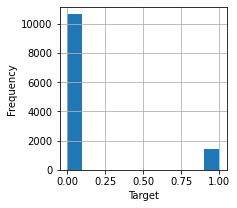

In [23]:
# Plotting The Hist of Target Values To see the Frequency Distribution
plt.figure(figsize=(3,3))
plt.hist(y_train);plt.xlabel('Target')
plt.ylabel('Frequency');plt.grid('True')
plt.show()

From The Histogram of the Target Values It 
Can be seen that there is an imbalance in 
the target with a ratio of 90:10 %

There are three columns in Date and Time formats
Namely Policy Start Date,Policy End Date and 
First Transaction Date

In [24]:
data[['Policy Start Date','Policy End Date','First Transaction Date']].head(5)

,Policy Start Date,Policy End Date,First Transaction Date
0,2010-05-14,2011-05-13,2010-05-14
1,2010-11-29,2011-11-28,2010-11-29
2,2010-03-21,2011-03-20,2010-03-21
3,2010-08-21,2011-08-20,2010-08-21
4,2010-08-29,2010-12-31,2010-08-29


These Date Time Feature format cannot be used for analysis
in its raw format. To extract useful features from it we split
the Year,Month and Day and then add them up this will make it 
available for use in Analysis.

In [25]:
# Function that splits date time objects into year,month and day and then adds them up
def date_time_func(col):
    # Input(col) into this function must be a list type
    count=0;result=[]
    for x in range(len(col)):
        u=col[x].split('-')
        for y in u:
            v=int(y);count+=v
        result.append(count);count=0
    return result
#Output from this function will be a list type

In [26]:
# Convert each of the datetime column to list then apply date_time_func
# for Policy Start Date
dates=list(data['Policy Start Date'])
#Applying function date_time_func
start=date_time_func(dates)

In [27]:
start[:10]

[2029, 2050, 2034, 2039, 2047, 2041, 2020, 2031, 2023, 2040]

In [28]:
# Replace policy start date with start
data['Policy Start Date']=start
# doing same for other date time columns
dates_end=list(data['Policy End Date'])
end=date_time_func(dates_end)
data['Policy End Date']=end
dates_trans=list(data['First Transaction Date'])
tran=date_time_func(dates_trans)
data['First Transaction Date']=tran

In [29]:
data['First Transaction Date']=tran

In [30]:
data['First Transaction Date']

0       2029
1       2050
2       2034
3       2039
4       2047
        ... 
5172    2035
5173    2026
5174    2043
5175    2034
5176    2034
Name: First Transaction Date, Length: 17256, dtype: int64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17256 entries, 0 to 5176
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      17256 non-null  object
 1   Policy Start Date       17256 non-null  int64 
 2   Policy End Date         17256 non-null  int64 
 3   Gender                  16741 non-null  object
 4   Age                     17256 non-null  int64 
 5   First Transaction Date  17256 non-null  int64 
 6   No_Pol                  17256 non-null  int64 
 7   Car_Category            11880 non-null  object
 8   Subject_Car_Colour      7289 non-null   object
 9   Subject_Car_Make        13719 non-null  object
 10  LGA_Name                7998 non-null   object
 11  State                   7980 non-null   object
 12  ProductName             17256 non-null  object
dtypes: int64(5), object(8)
memory usage: 1.3+ MB


In [32]:
data['Gender'].value_counts()

Male            10888
Female           4735
Entity            413
Joint Gender      306
NOT STATED        244
NO GENDER         101
SEX                54
Name: Gender, dtype: int64

Gender Column have some missing values in addition to other 
gender attributes that are not clearly specified
We convert every other gender value that is not Male or Female
into missing values for ease of grouping

In [33]:
data['Gender'].replace(['NOT STATED','NO GENDER','SEX','Joint Gender','Entity'],[np.nan,np.nan,np.nan,np.nan,np.nan],inplace=True)

In [34]:
data.Gender.value_counts()

Male      10888
Female     4735
Name: Gender, dtype: int64

In [35]:
data.Gender.isnull().sum()

1633

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17256 entries, 0 to 5176
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      17256 non-null  object
 1   Policy Start Date       17256 non-null  int64 
 2   Policy End Date         17256 non-null  int64 
 3   Gender                  15623 non-null  object
 4   Age                     17256 non-null  int64 
 5   First Transaction Date  17256 non-null  int64 
 6   No_Pol                  17256 non-null  int64 
 7   Car_Category            11880 non-null  object
 8   Subject_Car_Colour      7289 non-null   object
 9   Subject_Car_Make        13719 non-null  object
 10  LGA_Name                7998 non-null   object
 11  State                   7980 non-null   object
 12  ProductName             17256 non-null  object
dtypes: int64(5), object(8)
memory usage: 1.3+ MB


In [37]:
data.Age.value_counts()

 40      1171
 50       889
 41       707
 36       705
 38       664
         ... 
 17         1
 88         1
 102        1
 133        1
-6099       1
Name: Age, Length: 110, dtype: int64

In [38]:
data.Age.describe()

count    17256.000000
mean        42.677272
std         82.489880
min      -6099.000000
25%         34.000000
50%         40.000000
75%         50.000000
max        320.000000
Name: Age, dtype: float64

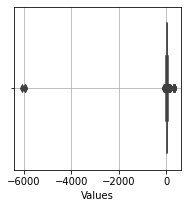

In [39]:
# Visualizing Age Feature using Boxplot
plt.close();plt.figure(figsize=(3,3))
sns.boxplot(data=data,x='Age')
plt.xlabel('Values');
plt.grid('True')
plt.show()

From the Boxplot we can see that There are some unusual
values in the Age such as Ages less than 0 These values are unusual and indicates an errors in the Age Feature

In [40]:
data.Age.describe()

count    17256.000000
mean        42.677272
std         82.489880
min      -6099.000000
25%         34.000000
50%         40.000000
75%         50.000000
max        320.000000
Name: Age, dtype: float64

The min values in Age is -6099 while the maximum value is 320
These values are impractical and we have little or no information about them.
Our Preferred solution to this is to replace all Ages less than 0 and greater than 100 with NaN
And thereafter fill them with the mean of the Ages

In [41]:
#Handling the Age column
#For values greater than 100
age=np.where(data.Age>100,np.nan,data.Age)
data.Age=age
#For values less than 0
age=np.where(data.Age<0,np.nan,data.Age)
data.Age=age
data.Age.fillna(data.Age.mean(),inplace=True)
data.Age.describe()

count    17256.000000
mean        41.057600
std         13.862711
min          0.000000
25%         35.000000
50%         40.000000
75%         48.000000
max        100.000000
Name: Age, dtype: float64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17256 entries, 0 to 5176
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      17256 non-null  object 
 1   Policy Start Date       17256 non-null  int64  
 2   Policy End Date         17256 non-null  int64  
 3   Gender                  15623 non-null  object 
 4   Age                     17256 non-null  float64
 5   First Transaction Date  17256 non-null  int64  
 6   No_Pol                  17256 non-null  int64  
 7   Car_Category            11880 non-null  object 
 8   Subject_Car_Colour      7289 non-null   object 
 9   Subject_Car_Make        13719 non-null  object 
 10  LGA_Name                7998 non-null   object 
 11  State                   7980 non-null   object 
 12  ProductName             17256 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 1.3+ MB


For the purposes of missing values Cat Codes encoder from the pandas package is a suitable encoder
for NaN putting them in a seperate group of -1


In [44]:
# For cat codes first seperate the features with object dtypes/
object_data=data.select_dtypes('object')
# Convert object_data dtypes from object to category
object_data=object_data.astype('category')
# iterate over each column in object_data and convert each to cat codes
for x in object_data.columns:
    object_data[x]=object_data[x].cat.codes
object_data

,ID,Gender,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,0,1,8,4,68,-1,-1,1
1,1,0,2,26,68,-1,-1,1
2,2,1,8,32,68,-1,-1,1
3,3,1,-1,-1,-1,-1,-1,5
4,5,-1,-1,-1,-1,165,74,8
...,...,...,...,...,...,...,...,...
5172,17242,1,8,-1,27,-1,-1,5
5173,17244,-1,-1,-1,-1,258,74,1
5174,17246,1,-1,-1,-1,-1,-1,5
5175,17251,0,8,26,68,-1,-1,1


In [45]:
# Replace columns with object dtype in data with the encodings from object_data to complete encoding
for x in object_data.columns:
    data[x]=object_data[x]

In [46]:
data.head(10)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,0,2029,2029,1,30.0,2029,1,8,4,68,-1,-1,1
1,1,2050,2050,0,79.0,2050,1,2,26,68,-1,-1,1
2,2,2034,2034,1,43.0,2034,1,8,32,68,-1,-1,1
3,3,2039,2039,1,2.0,2039,1,-1,-1,-1,-1,-1,5
4,5,2047,2053,-1,20.0,2047,3,-1,-1,-1,165,74,8
5,6,2041,2041,1,37.0,2041,2,-1,-1,-1,-1,-1,1
6,7,2020,2020,0,40.0,2020,3,-1,-1,-1,123,74,0
7,8,2031,2031,1,43.0,2031,1,8,-1,68,-1,-1,5
8,9,2023,2023,0,71.0,2023,2,2,4,58,52,23,1
9,10,2040,2040,0,58.0,2040,1,-1,-1,-1,89,39,1


The entries with value -1 were the Null values

# FEATURE_EXTRACTION(S)

1. The Policy Range or Duration can be gotten from the absolute value Difference between 
the Policy End Date and Policy Start Date

In [47]:
data['Policy Range']=np.abs(data['Policy End Date'])-np.abs(data['Policy Start Date'])

2. The Difference between The Policy Start Date 
and a Fixed point in Time in this case 2020 is gotten 

In [48]:
data['Policy_Status']=2020-data['Policy Start Date']

3. Combine the car category feature with subject car make by summing them up

In [49]:
data['cat_make']=data['Car_Category']+data['Subject_Car_Make']

4. Combine Subject Car Colour Feature and Car Category feature

In [50]:
data['Cat_Col']=data['Car_Category']-data['Subject_Car_Colour']

In [51]:
data.head(10)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,Policy Range,Policy_Status,cat_make,Cat_Col
0,0,2029,2029,1,30.0,2029,1,8,4,68,-1,-1,1,0,-9,76,4
1,1,2050,2050,0,79.0,2050,1,2,26,68,-1,-1,1,0,-30,70,-24
2,2,2034,2034,1,43.0,2034,1,8,32,68,-1,-1,1,0,-14,76,-24
3,3,2039,2039,1,2.0,2039,1,-1,-1,-1,-1,-1,5,0,-19,-2,0
4,5,2047,2053,-1,20.0,2047,3,-1,-1,-1,165,74,8,6,-27,-2,0
5,6,2041,2041,1,37.0,2041,2,-1,-1,-1,-1,-1,1,0,-21,-2,0
6,7,2020,2020,0,40.0,2020,3,-1,-1,-1,123,74,0,0,0,-2,0
7,8,2031,2031,1,43.0,2031,1,8,-1,68,-1,-1,5,0,-11,76,9
8,9,2023,2023,0,71.0,2023,2,2,4,58,52,23,1,0,-3,60,-2
9,10,2040,2040,0,58.0,2040,1,-1,-1,-1,89,39,1,0,-20,-2,0


Get Dummy Variable for Gender and ProductName Features

In [52]:
data_dummy=pd.get_dummies(data,columns=['Gender','ProductName'],drop_first=True)

In [53]:
data_dummy

,ID,Policy Start Date,Policy End Date,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,...,Gender_0,Gender_1,ProductName_1,ProductName_2,ProductName_3,ProductName_4,ProductName_5,ProductName_6,ProductName_7,ProductName_8
0,0,2029,2029,30.0,2029,1,8,4,68,-1,...,0,1,1,0,0,0,0,0,0,0
1,1,2050,2050,79.0,2050,1,2,26,68,-1,...,1,0,1,0,0,0,0,0,0,0
2,2,2034,2034,43.0,2034,1,8,32,68,-1,...,0,1,1,0,0,0,0,0,0,0
3,3,2039,2039,2.0,2039,1,-1,-1,-1,-1,...,0,1,0,0,0,0,1,0,0,0
4,5,2047,2053,20.0,2047,3,-1,-1,-1,165,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5172,17242,2035,2035,48.0,2035,1,8,-1,27,-1,...,0,1,0,0,0,0,1,0,0,0
5173,17244,2026,2026,50.0,2026,1,-1,-1,-1,258,...,0,0,1,0,0,0,0,0,0,0
5174,17246,2043,2043,1.0,2043,1,-1,-1,-1,-1,...,0,1,0,0,0,0,1,0,0,0
5175,17251,2034,2034,52.0,2034,1,8,26,68,-1,...,1,0,1,0,0,0,0,0,0,0


In [54]:
data.shape

(17256, 17)

In [69]:
data_dummy.drop('ID',axis=1,inplace=True)

In [75]:
# We first split our Dataset back into train and test data
train_data=data_dummy.iloc[:12079]
test_data=data_dummy.iloc[12079:]

In [73]:
train_data.shape

(12079, 24)

In [74]:
test_data.head(10)

,Policy Start Date,Policy End Date,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,...,Gender_0,Gender_1,ProductName_1,ProductName_2,ProductName_3,ProductName_4,ProductName_5,ProductName_6,ProductName_7,ProductName_8
0,2038,2041,25.0000,2038,1,-1,0,34,258,74,...,0,0,0,0,0,0,0,0,0,0
1,2012,2053,41.0576,2012,4,-1,0,68,258,74,...,0,0,0,0,0,0,0,0,0,1
2,2043,2043,46.0000,2043,1,-1,-1,22,18,7,...,1,0,1,0,0,0,0,0,0,0
3,2034,2034,32.0000,2034,1,-1,-1,-1,161,23,...,0,1,1,0,0,0,0,0,0,0
4,2035,2053,41.0576,2035,4,-1,-1,68,258,74,...,0,0,0,0,0,0,0,0,0,1
5,2047,2047,45.0000,2047,2,8,4,27,263,6,...,1,0,1,0,0,0,0,0,0,0
6,2029,2029,58.0000,2029,1,8,-1,68,-1,-1,...,1,0,0,0,0,0,1,0,0,0
7,2018,2047,41.0576,2018,1,8,32,30,258,74,...,0,0,1,0,0,0,0,0,0,0
8,2038,2034,37.0000,2038,1,2,-1,68,-1,-1,...,1,0,0,0,0,1,0,0,0,0
9,2035,2034,42.0000,2035,1,2,-1,2,-1,-1,...,0,1,0,0,0,0,1,0,0,0


# MODEL BUILDING 

In [77]:
#Fitting a Decision Tree Classifier
tree_clf=DecisionTreeClassifier(random_state=42)
seed=42
tree_clf.fit(train_data,y_train)

DecisionTreeClassifier(random_state=42)

In [81]:
#Evaluate using k-fold Validation
tree_pre=cross_val_predict(tree_clf,train_data,y_train,cv=5)
# Confusion Matrix
print(confusion_matrix(y_train,tree_pre))
#F1_score
print('f1_score:',f1_score(y_train,tree_pre))

[[9449 1175]
 [1147  308]]
f1_score: 0.20966643975493532


From The confusion matrix of the DecisionTreeClassifier
it can be seen that the classifier performs very well on
one class which is the negative class but fails woefully on predicting the 
other class which is the positive class. This may be attributed to the skewness in the dataset
i.e The imbalance between the Positive class target and the Negative Class target, they are skewed
in a ratio of 10:90 therefore the classifier tend to predict  Positive classes as a negative classes because it has little information about the positive classes of the target

Possible Solutions to this is:
1. Use of Weights to compel the classifier to pay more attention to the classes with lesser occurence
2. OverSampling the Fewer classes instances or Under Sampling the Larger Class Instances

In Our Solution We Used the RandomOverSampler from the over_sampling class in imblearn module

In [87]:
# Over_sampling using RandomOverSampler from imblearn module
over=RandomOverSampler(sampling_strategy=0.8)
#We are making the fewer instances to be 0.8% of the mucher instances
x_over,y_over=over.fit_resample(train_data,y_train)
print(x_over.shape)
print(y_over.shape)

(19123, 24)
(19123,)


The Train dataset now contains a total of 19123 of duplicating instances up from the original 12079  skewd instances

In [90]:
# Refitting the tree_clf on this new data 
tree_clf.fit(x_over,y_over)

DecisionTreeClassifier(random_state=42)

In [93]:
#Evaluating using k-fold cross validation
tree_pre=cross_val_predict(tree_clf,x_over,y_over,cv=5)
print(confusion_matrix(y_over,tree_pre))
print('F1_score:',f1_score(y_over,tree_pre))

[[8981 1643]
 [  81 8418]]
F1_score: 0.9071120689655172


The F1_score of the over_sampled dataset from above is 0.907
this is a stark increase from the first F1_score of 0.20 gotren from the original skewd datset
.This score may not represent the true F1_score due to the fact that over-sampling of data normally leads to overfitting
in some instances and in this case it is overfitting the data. To reduce the risk of overfitting we use an ensemble classifiers that fits
ny trees on diffrent subset of the data.

# Random Forest 

we try to fit the the RandomForestClassifier with different 
number of estimators.

In [94]:
estimators=[2,5,10,15,20,40,50] #List of different estimators
scores=[] # A list to record the possible scores
for x in estimators:
    forest_clf=RandomForestClassifier(random_state=42,n_estimators=x)
    # K-Fold validation
    forest_pre=cross_val_predict(forest_clf,x_over,y_over,cv=5)
    scores.append(f1_score(y_over,forest_pre))


In [112]:
print(len(scores))

7


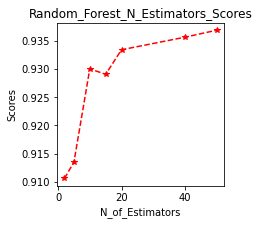

In [114]:
#Plot The Number of estimators against Scores
plt.close()
plt.figure(figsize=(3,3))
plt.plot(estimators,scores,'r*--')
plt.xlabel('N_of_Estimators');plt.ylabel('Scores')
plt.title('Random_Forest_N_Estimators_Scores')
plt.show()

from the plot above we pick the n_estimators with the highest score in this case 50
and retrain our classifier on it

In [122]:
#RandomForestClassifier Model
forest_clf=RandomForestClassifier(n_estimators=50,random_state=42)
#fitting the model
forest_clf.fit(x_over,y_over)


RandomForestClassifier(n_estimators=50, random_state=42)

In [124]:
#K-Fold Validation
forest_pre=cross_val_predict(forest_clf,x_over,y_over,cv=5)
print(confusion_matrix(y_over,forest_pre))
print('F1_score:',f1_score(y_over,forest_pre))

[[9547 1077]
 [  60 8439]]
F1_score: 0.9368859283930059


The RandomForestClassifier performs genrally better but still suffers greatly from overfitting


In [127]:
#Predict Test Instances
test_pre=forest_clf.predict(test_data)
#Import SampleSubmission
sub=pd.read_csv('SampleSubmission.csv')
# Replace 'target' column in SampleSubmission to test prediction
sub['target']=test_pre
sub

,ID,target
0,009D84L,1
1,01DO2EQ,1
2,01QM0NU,0
3,024NJLZ,0
4,02BYET3,1
...,...,...
5172,ZYXX5AF,0
5173,ZYYOZ5L,0
5174,ZZ1GTKD,0
5175,ZZDXQSI,1
